In [ ]:
import pandas as pd
# Load the dataset
train_data = pd.read_csv('/content/Titanic_train.csv')
test_data = pd.read_csv('/content/Titanic_test.csv')



In [ ]:
print(train_data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


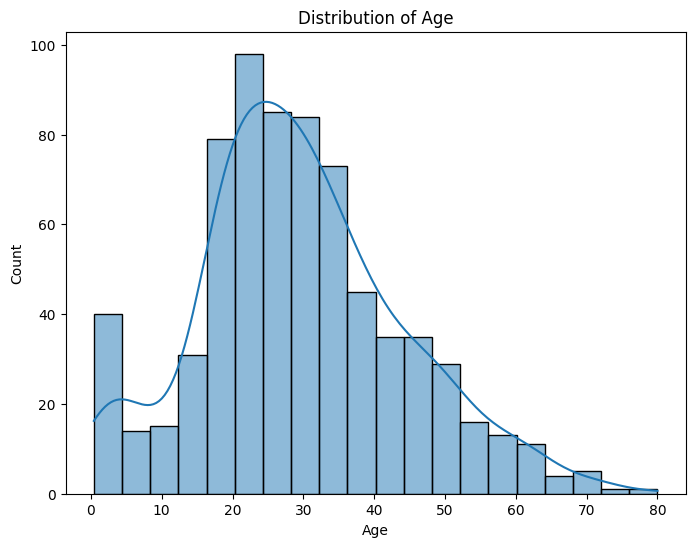

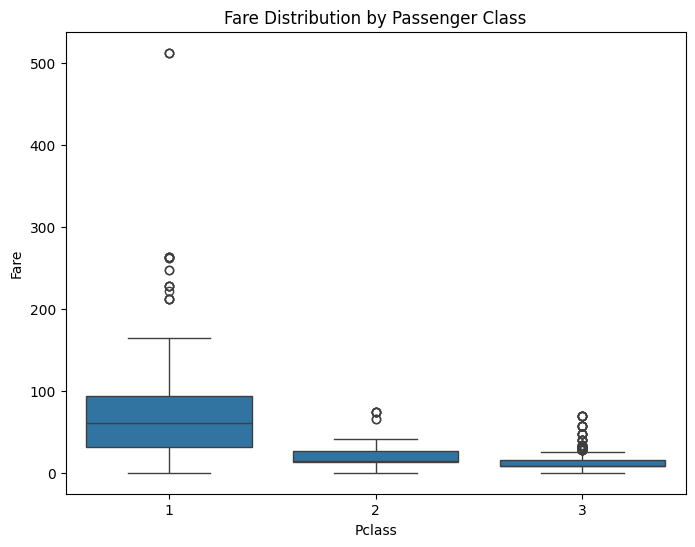

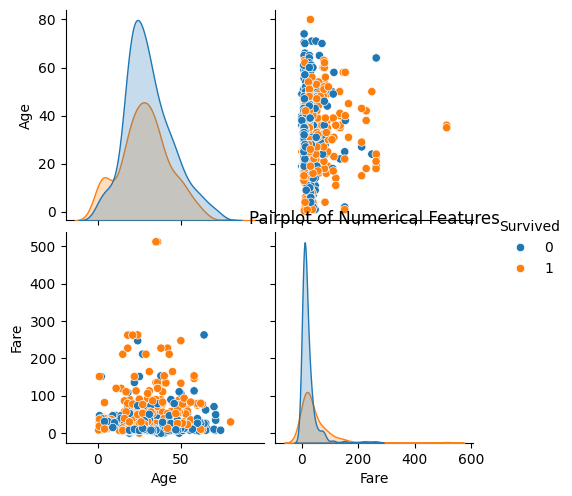

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

# Boxplot for Fare by Pclass
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=train_data)
plt.title('Fare Distribution by Passenger Class')
plt.show()

# Pairplot for numerical features
sns.pairplot(train_data[['Age', 'Fare', 'Survived']], hue='Survived', diag_kind='kde')
plt.title('Pairplot of Numerical Features')
plt.show()

In [ ]:
##Handle missing values
train_data.dropna(subset=['Age', 'Embarked'], inplace=True)
train_data['Cabin'] = train_data['Cabin'].fillna('Unknown')
test_data['Cabin'] = test_data['Cabin'].fillna('Unknown')

In [ ]:
#Encode categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

#Model Building
X = train_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

#Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print('Model Evaluation:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')


Model Evaluation:
Accuracy: 0.7972027972027972
Precision: 0.8541666666666666
Recall: 0.6507936507936508
F1 Score: 0.7387387387387387
ROC AUC Score: 0.7816468253968254


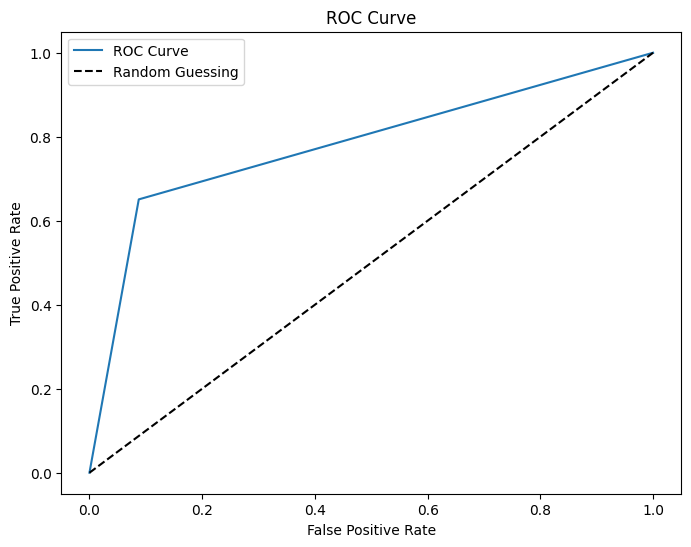

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
#Interpret coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print('Interpretation:')
print('Coefficients:')
print(coefficients)

Interpretation:
Coefficients:
      Feature  Coefficient
0      Pclass    -1.303682
1         Age    -0.037818
2       SibSp    -0.338313
3       Parch     0.004320
4        Fare    -0.000536
5    Sex_male    -2.569511
6  Embarked_Q    -0.165741
7  Embarked_S    -0.194358


In [ ]:
## b. Discuss feature significance
print('Feature Significance:')
print('Features with larger coefficients are more influential in predicting survival probability.')


Feature Significance:
Features with larger coefficients are more influential in predicting survival probability.


In [ ]:
train_data.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Unknown,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Unknown,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Unknown,True,False,True


In [ ]:
import joblib

In [ ]:
#saving our trained model
joblib.dump(model, 'titanic_survive')

['titanic_survive']

In [ ]:
#loading our train model
loaded_model=joblib.load('/content/titanic_survive')
loaded_model.predict(X_test)

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
#Code to deploy model on streamlit

import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('titanice_survive')

# Function to preprocess input data
def preprocess_input(data):
    # Apply one-hot encoding
    data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

    # Ensure all necessary columns are present
    necessary_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
    for col in necessary_columns:
        if col not in data.columns:
            data[col] = 0
    return data[necessary_columns]

# Function to make prediction
def predict_survival(data):
    preprocessed_data = preprocess_input(data)

    return model.predict(preprocessed_data)

# Create Streamlit app
def main():
    st.title('Titanic Survival Prediction')
    st.write('This app predicts the survival of passengers on the Titanic.')

    # User input for features
    Pclass = st.selectbox('Pclass', [1, 2, 3])
    Age = st.number_input('Age', min_value=0, max_value=100, value=30)
    SibSp = st.number_input('SibSp', min_value=0, max_value=8, value=0)
    Parch = st.number_input('Parch', min_value=0, max_value=6, value=0)
    Fare = st.number_input('Fare', min_value=0.0, max_value=600.0, value=30.0, step=0.01)
    Sex = st.selectbox('Sex', ['male', 'female'])
    Embarked = st.selectbox('Embarked', ['S', 'C', 'Q'])

    # Create input DataFrame
    input_data = pd.DataFrame({
        'Pclass': [Pclass], 'Age': [Age], 'SibSp': [SibSp],
        'Parch': [Parch], 'Fare': [Fare], 'Sex': [Sex], 'Embarked': [Embarked]
    })

    # Make prediction
    if st.button('Predict'):
        prediction = predict_survival(input_data)
        if prediction[0] == 1:
            st.write('The passenger is predicted to survive.')
        else:
            st.write('The passenger is predicted not to survive.')

# Run the app
if __name__ == '__main__':
    main()


ModuleNotFoundError: No module named 'streamlit'

**1. What is the difference between precision and recall?**

Precision: It measures how many predicted postive cases are actually positive

Recall:It measures how many positive cases it can find

**What is cross-validation, and why is it important in binary classification?**

Cross-validation helps to check how well a model will work on new data by repeatedly splitting the available data into training and testing sets. In binary classification, it ensures that the model can accurately tell apart the two classes without memorizing the training data, making sure it performs well on unseen data, which is important for real-world use.
